****Load/install necessary libraries****

In [1]:
!pip install opencv-python
!pip install torch torchvision torchaudio
!pip install tensorflow

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np

**EDA**

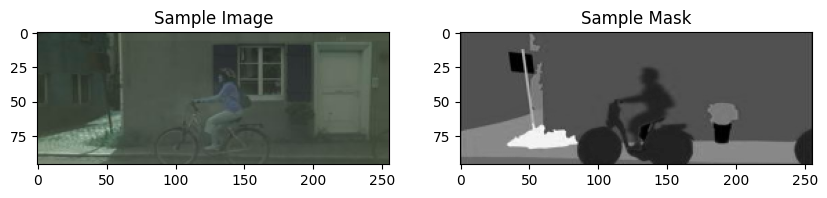

In [3]:
train_image_dir = '../input/cityscapes/train/img'
train_mask_dir = '../input/cityscapes/train/label'

# List all files in the image directory
image_files = os.listdir(train_image_dir)
mask_files = os.listdir(train_mask_dir)

# Load and display a sample image and its corresponding mask
sample_image = cv2.imread(os.path.join(train_image_dir, image_files[0]))
sample_mask = cv2.imread(os.path.join(train_mask_dir, mask_files[0]), cv2.IMREAD_GRAYSCALE)

# Display the image and mask 
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.title('Sample Image')

plt.subplot(1, 2, 2)
plt.imshow(sample_mask, cmap='gray')
plt.title('Sample Mask')

plt.show()


**Preprocess the Dataset**

In [4]:
import numpy as np

# Function to preprocess images and masks
def preprocess_image(image, mask, image_size=(128, 128)):
    # Resize image and mask
    image_resized = cv2.resize(image, image_size)
    mask_resized = cv2.resize(mask, image_size, interpolation=cv2.INTER_NEAREST)
    
    # Normalize image to range [0, 1]
    image_normalized = image_resized / 255.0
    
    # Convert image and mask to NumPy arrays
    image_np = np.array(image_normalized, dtype=np.float32)
    mask_np = np.array(mask_resized, dtype=np.int64)  # Keep mask as integer labels

    return image_np, mask_np

# Preprocess a sample image and mask
preprocessed_image, preprocessed_mask = preprocess_image(sample_image, sample_mask)

print("Preprocessed Image Shape:", preprocessed_image.shape)
print("Preprocessed Mask Shape:", preprocessed_mask.shape)


Preprocessed Image Shape: (128, 128, 3)
Preprocessed Mask Shape: (128, 128)


In [14]:
import os
print(os.listdir('/kaggle/input/'))


['cityscapes', 'yolo3cfg-and-weights']


**Load an Image from the cityscapes/train/img Folder**

In [17]:
import os
import cv2

# Path to the train images
cityscapes_train_images_path = '/kaggle/input/cityscapes/train/img'

# List files in the train img folder to find an image
print(os.listdir(cityscapes_train_images_path))

# Load the first image from the cityscapes dataset (replace 'your_image.png' with an actual image name from the folder)
image_files = os.listdir(cityscapes_train_images_path)
image_path = os.path.join(cityscapes_train_images_path, image_files[0])

# Load the image using OpenCV
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    print("Error: Image not found. Please check the file path.")
else:
    print(f"Image loaded successfully. Shape: {img.shape}")


['train1712.png', 'train1606.png', 'train311.png', 'train776.png', 'train672.png', 'train834.png', 'train1051.png', 'train2470.png', 'train169.png', 'train626.png', 'train127.png', 'train542.png', 'train1149.png', 'train394.png', 'train2657.png', 'train1218.png', 'train2528.png', 'train2376.png', 'train2648.png', 'train2818.png', 'train1464.png', 'train2491.png', 'train886.png', 'train384.png', 'train1402.png', 'train1285.png', 'train1501.png', 'train1568.png', 'train1264.png', 'train979.png', 'train1294.png', 'train30.png', 'train1000.png', 'train2926.png', 'train2467.png', 'train2690.png', 'train1886.png', 'train2221.png', 'train1475.png', 'train2329.png', 'train2452.png', 'train851.png', 'train1085.png', 'train2684.png', 'train1559.png', 'train287.png', 'train910.png', 'train2662.png', 'train2080.png', 'train1512.png', 'train980.png', 'train1117.png', 'train2088.png', 'train2698.png', 'train2587.png', 'train526.png', 'train316.png', 'train2683.png', 'train2593.png', 'train453.png', 

**Load YOLO Weights and Configuration**

In [18]:
# Load YOLO from the correct directory
net = cv2.dnn.readNet("/kaggle/input/yolo3cfg-and-weights/yolov3.weights", 
                      "/kaggle/input/yolo3cfg-and-weights/yolov3.cfg")

# Print the layers to verify successful loading
layer_names = net.getLayerNames()
print("YOLO model loaded successfully.")


YOLO model loaded successfully.


**Perform Object Detection on the Loaded Image**

Image files: ['train1712.png', 'train1606.png', 'train311.png', 'train776.png', 'train672.png', 'train834.png', 'train1051.png', 'train2470.png', 'train169.png', 'train626.png', 'train127.png', 'train542.png', 'train1149.png', 'train394.png', 'train2657.png', 'train1218.png', 'train2528.png', 'train2376.png', 'train2648.png', 'train2818.png', 'train1464.png', 'train2491.png', 'train886.png', 'train384.png', 'train1402.png', 'train1285.png', 'train1501.png', 'train1568.png', 'train1264.png', 'train979.png', 'train1294.png', 'train30.png', 'train1000.png', 'train2926.png', 'train2467.png', 'train2690.png', 'train1886.png', 'train2221.png', 'train1475.png', 'train2329.png', 'train2452.png', 'train851.png', 'train1085.png', 'train2684.png', 'train1559.png', 'train287.png', 'train910.png', 'train2662.png', 'train2080.png', 'train1512.png', 'train980.png', 'train1117.png', 'train2088.png', 'train2698.png', 'train2587.png', 'train526.png', 'train316.png', 'train2683.png', 'train2593.png', 'tr

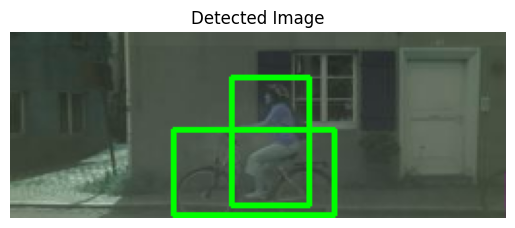

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load YOLO model from the correct directory
net = cv2.dnn.readNet("/kaggle/input/yolo3cfg-and-weights/yolov3.weights", 
                      "/kaggle/input/yolo3cfg-and-weights/yolov3.cfg")

# Print layer names to verify successful loading
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Path to the train images in Cityscapes
cityscapes_train_images_path = '/kaggle/input/cityscapes/train/img'

# List the image files to choose one to load
image_files = os.listdir(cityscapes_train_images_path)
print("Image files:", image_files)  # This will list the image files

# Load the first image in the directory (you can replace 'image_files[0]' with another file name if needed)
image_path = os.path.join(cityscapes_train_images_path, image_files[0])
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    print("Error: Image not found. Please check the file path.")
else:
    print(f"Image loaded successfully. Shape: {img.shape}")

# Get image dimensions
height, width, channels = img.shape

# Create a blob from the image for YOLO
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

# Run forward pass to get the detections
outs = net.forward(output_layers)

# Initialize lists for storing detection information
class_ids = []
confidences = []
boxes = []

# Process each detection
for out in outs:
    for detection in out:
        scores = detection[5:]  # Class scores start at index 5
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        if confidence > 0.5:  # Consider detections with confidence > 0.5
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Max Suppression to remove overlapping boxes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw bounding boxes on the image
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(class_ids[i])  # Class ID as label (you can map this to actual class names if needed)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Use Matplotlib to display the image with bounding boxes
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title("Detected Image")
plt.axis('off')  # Hide axis
plt.show()


**Define COCO Class Names Directly in the Code and Display Labels on the Image**

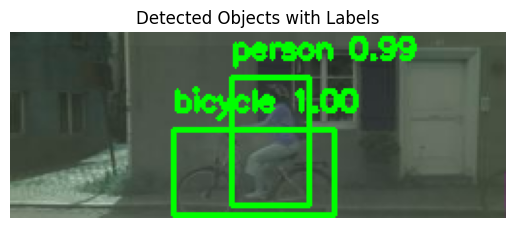

In [22]:
# List of 80 COCO classes
classes = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", 
           "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", 
           "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", 
           "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", 
           "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", 
           "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", 
           "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", 
           "chair", "couch", "potted plant", "bed", "dining table", "toilet", "TV", "laptop", 
           "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", 
           "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

# Draw bounding boxes and labels on the image
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])  # Map the class ID to the actual class name
        confidence = confidences[i]
        
        # Display the label and confidence on the bounding box
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with labels using Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Detected Objects with Labels")
plt.axis('off')
plt.show()


In [23]:
# Save the image with detected objects
output_image_path = "detected_image.jpg"
cv2.imwrite(output_image_path, img)

print(f"Image saved successfully at: {output_image_path}")


Image saved successfully at: detected_image.jpg


In [35]:
# Define the threshold for determining high traffic
threshold = 5  # Adjust as necessary for your traffic condition

# Count the number of detected vehicles (assuming cars, buses, and trucks have these IDs)
vehicle_count = 0
for class_id in class_ids:
    if class_id in [2, 5, 7]:  # Class IDs for car, bus, truck
        vehicle_count += 1

print(f"Number of vehicles detected: {vehicle_count}")

# Signal timing logic based on vehicle count
if vehicle_count > threshold:
    green_signal_time = 60  # 60 seconds for higher traffic
else:
    green_signal_time = 30  # 30 seconds for lower traffic

print(f"Green signal time: {green_signal_time} seconds")


Number of vehicles detected: 0
Green signal time: 30 seconds


In [36]:
# List of COCO classes
classes = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", 
           "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", 
           "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", 
           "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", 
           "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", 
           "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", 
           "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", 
           "chair", "couch", "potted plant", "bed", "dining table", "toilet", "TV", "laptop", 
           "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", 
           "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

# Check all detected objects and their class names
for i in range(len(boxes)):
    if i in indexes:
        class_id = class_ids[i]
        label = classes[class_id]
        confidence = confidences[i]
        print(f"Detected object: {label} with confidence {confidence:.2f}")

# Now we can count vehicles (car, bus, truck) based on correct class IDs
vehicle_count = 0
for class_id in class_ids:
    if class_id in [2, 5, 7]:  # Car, Bus, Truck
        vehicle_count += 1

print(f"Number of vehicles detected: {vehicle_count}")

# Adjust signal time based on vehicle count
threshold = 5  # You can adjust this threshold
if vehicle_count > threshold:
    green_signal_time = 60  # 60 seconds for higher traffic
else:
    green_signal_time = 30  # 30 seconds for lower traffic

print(f"Green signal time: {green_signal_time} seconds")


Detected object: bicycle with confidence 1.00
Detected object: person with confidence 0.99
Number of vehicles detected: 0
Green signal time: 30 seconds


In [37]:
# Now we can count vehicles (car, bus, truck, and bicycle) based on correct class IDs
vehicle_count = 0
for class_id in class_ids:
    if class_id in [1, 2, 5, 7]:  # Bicycle (1), Car (2), Bus (5), Truck (7)
        vehicle_count += 1

print(f"Number of vehicles detected: {vehicle_count}")

# Adjust signal time based on vehicle count
threshold = 5  # Adjust as needed for your scenario
if vehicle_count > threshold:
    green_signal_time = 60  # 60 seconds for higher traffic
else:
    green_signal_time = 30  # 30 seconds for lower traffic

print(f"Green signal time: {green_signal_time} seconds")


Number of vehicles detected: 2
Green signal time: 30 seconds


In [38]:
# Adjust signal time proportional to vehicle count (with some bounds)
min_time = 30  # Minimum green signal time
max_time = 60  # Maximum green signal time
scaling_factor = 5  # Adjust scaling factor as needed

# Signal time increases proportionally with vehicle count
green_signal_time = min(max_time, max(min_time, vehicle_count * scaling_factor))

print(f"Proportional green signal time: {green_signal_time} seconds")


Proportional green signal time: 30 seconds


In [40]:
# Save any images/results as needed
cv2.imwrite("traffic_signal_result.jpg", img)


True

In [41]:
import os
print(os.listdir('/kaggle/working')) 


['traffic_signal_result.jpg', 'detected_image.jpg', '.virtual_documents']
